<a href="https://colab.research.google.com/github/BrendonBernardino/pixel_classification_cow/blob/master/Classification_cows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 #lib opencv
import numpy as np #lib manipulação imagens
import os #acesso a recursos do SO
import zipfile #base de dados estará em zip pra poder descompactar
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd #lib para ler arquivos csv e outros tratamentos
import seaborn as sns #lib de visualização de graficos
import matplotlib.pyplot as plt #lib de visualização de graficos
tf.__version__

'2.17.1'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
diretorio_with_cow = '/content/drive/MyDrive/Dataset_TCC/ESP_Master/with_cow'
diretorio_no_cow = '/content/drive/MyDrive/Dataset_TCC/ESP_Master/no_cow'

files_with_cow = [os.path.join(diretorio_with_cow, f) for f in sorted(os.listdir(diretorio_with_cow))]
files_no_cow = [os.path.join(diretorio_no_cow, f) for f in sorted(os.listdir(diretorio_no_cow))]
print(files_with_cow)
print(files_no_cow)

['/content/drive/MyDrive/Dataset_TCC/ESP_Master/with_cow/pic100.jpg', '/content/drive/MyDrive/Dataset_TCC/ESP_Master/with_cow/pic102.jpg', '/content/drive/MyDrive/Dataset_TCC/ESP_Master/with_cow/pic106.jpg', '/content/drive/MyDrive/Dataset_TCC/ESP_Master/with_cow/pic109.jpg', '/content/drive/MyDrive/Dataset_TCC/ESP_Master/with_cow/pic110.jpg', '/content/drive/MyDrive/Dataset_TCC/ESP_Master/with_cow/pic111.jpg', '/content/drive/MyDrive/Dataset_TCC/ESP_Master/with_cow/pic112.jpg', '/content/drive/MyDrive/Dataset_TCC/ESP_Master/with_cow/pic113.jpg', '/content/drive/MyDrive/Dataset_TCC/ESP_Master/with_cow/pic115.jpg', '/content/drive/MyDrive/Dataset_TCC/ESP_Master/with_cow/pic116.jpg', '/content/drive/MyDrive/Dataset_TCC/ESP_Master/with_cow/pic117.jpg', '/content/drive/MyDrive/Dataset_TCC/ESP_Master/with_cow/pic118.jpg', '/content/drive/MyDrive/Dataset_TCC/ESP_Master/with_cow/pic12.jpg', '/content/drive/MyDrive/Dataset_TCC/ESP_Master/with_cow/pic122.jpg', '/content/drive/MyDrive/Dataset_TC

In [4]:
largura, altura = 128, 128

In [5]:
imagens = []
classes = []
# 0 - images with cow // 1 - images without cow

In [6]:
for imagem_path in files_with_cow:
  try:
    imagem = cv2.imread(imagem_path)
    (H, W) = imagem.shape[:2]
  except:
    continue

  imagem = cv2.resize(imagem, (largura, altura))
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
  # cv2_imshow(imagem)

  imagem = imagem.ravel() #transforma de matriz pra vetor
  # print(imagem.shape)

  imagens.append(imagem)
  classe = 0 # Primeira característica

  classes.append(classe)
  # print(classe)

for imagem_path2 in files_no_cow:
  try:
    imagem2 = cv2.imread(imagem_path2)
    (H, W) = imagem2.shape[:2]
  except:
    continue

  imagem2 = cv2.resize(imagem2, (largura, altura))
  imagem2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)
  # cv2_imshow(imagem2)

  imagem2 = imagem2.ravel() #transforma de matriz pra vetor
  # print(imagem2.shape)

  imagens.append(imagem2)
  classe = 1 # Segunda característica

  classes.append(classe)
  # print(classe)

In [7]:
X = np.asarray(imagens)
y = np.asarray(classes)

In [8]:
X.shape

(503, 16384)

In [9]:
y.shape

(503,)

<Axes: ylabel='count'>

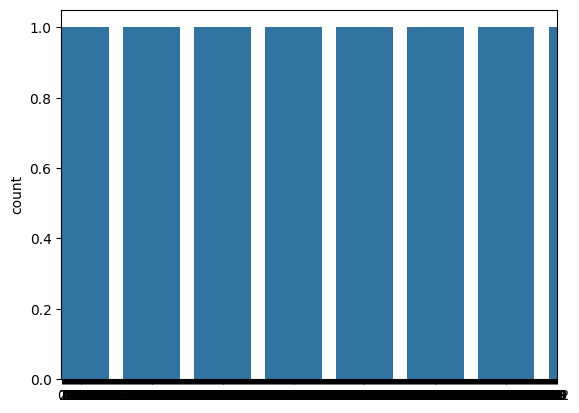

In [10]:
sns.countplot(y)

In [11]:
np.unique(y, return_counts=True)

(array([0, 1]), array([382, 121]))

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [13]:
X[0].max(), X[0].min()

(1.0000000000000002, 0.0)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [16]:
X_treinamento.shape, y_treinamento.shape

((352, 16384), (352,))

In [17]:
X_teste.shape, y_teste.shape

((151, 16384), (151,))

In [18]:
128 * 128

16384

In [19]:
(16384 + 2)/2

8193.0

In [27]:
# 59536 --> 29769
network1 = tf.keras.models.Sequential()
# network1.add(tf.keras.layers.Dense(input_shape = (16384,), units = 29769, activation = 'relu')) #camada densa pois um neuronio esta ligado a todos os neuronios da camada seguinte
network1.add(tf.keras.layers.Input(shape=(16384,)))
network1.add(tf.keras.layers.Dense(units = 8193, activation = 'relu'))
network1.add(tf.keras.layers.Dense(units = 8193, activation = 'relu'))
network1.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

network1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 8193)                │     134,242,305 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8193)                │      67,133,442 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
network1.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
historico = network1.fit(X_treinamento, y_treinamento, epochs = 75)

Epoch 1/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4895 - loss: 46.8197
Epoch 2/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6308 - loss: 4.0252
Epoch 3/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7361 - loss: 0.7464
Epoch 4/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6683 - loss: 0.8407
Epoch 5/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6456 - loss: 2.3094
Epoch 6/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7911 - loss: 0.4411
Epoch 7/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8224 - loss: 0.4362
Epoch 8/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8183 - loss: 0.4382
Epoch 9/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8209 - loss: 0.4116
Epoch 10/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8636 - loss: 0.3694
Epoch 11/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8319 - loss: 0.3791
Epoch 12/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy

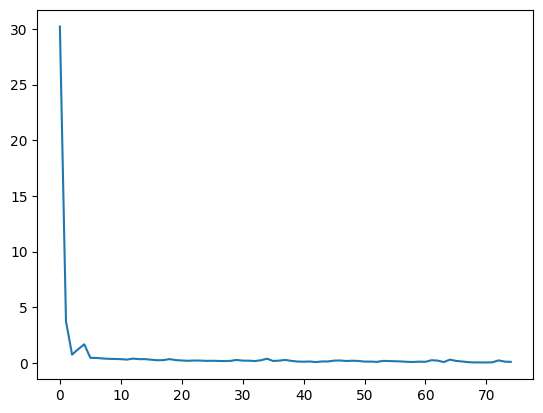

In [31]:
plt.plot(historico.history['loss'])

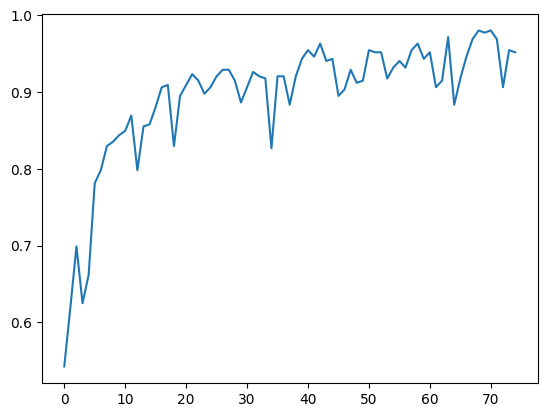

In [32]:
plt.plot(historico.history['accuracy'])

In [33]:
previsoes = network1.predict(X_teste)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step


In [34]:
previsoes = (previsoes > 0.5)
previsoes

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [35]:
y_teste

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_teste, previsoes)

0.9205298013245033

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, previsoes)
cm

array([[113,   5],
       [  7,  26]])

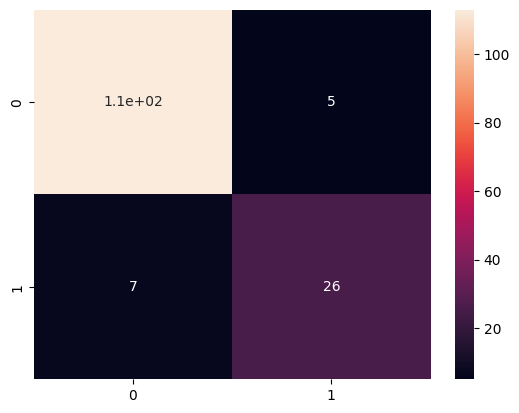

In [39]:
sns.heatmap(cm, annot=True);

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       118
           1       0.84      0.79      0.81        33

    accuracy                           0.92       151
   macro avg       0.89      0.87      0.88       151
weighted avg       0.92      0.92      0.92       151



In [41]:
model_json = network1.to_json()
with open ('network1.json', 'w') as json_file:
  json_file.write(model_json)

In [42]:
from keras.models import save_model
network1_saved = save_model(network1, 'weights1.hdf5')

In [43]:
with open('network1.json') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_1", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 16384], "dtype": "float32", "sparse": false, "name": "input_layer_1"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_c

In [44]:
network1_loaded = tf.keras.models.model_from_json(json_saved_model)
network1_loaded.load_weights('/content/weights1.hdf5')
network1_loaded.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [45]:
network1_loaded.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 8193)                │     134,242,305 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8193)                │      67,133,442 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
test_img = 76
X_teste[test_img], y_teste[test_img]

(array([1.        , 1.        , 0.995     , ..., 0.03111111, 0.03448276,
        0.03587444]),
 0)

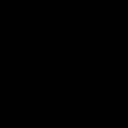

In [86]:
cv2_imshow(X_teste[test_img].reshape(128,128))

In [87]:
imagem_teste = X_teste[test_img]
imagem_teste = scaler.inverse_transform(imagem_teste.reshape(1, -1))

In [88]:
imagem_teste

array([[254., 254., 253., ...,  36.,  30.,  39.]])

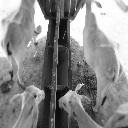

In [89]:
cv2_imshow(imagem_teste.reshape(128,128))

In [90]:
print(network1_loaded.predict(imagem_teste) [0][0])
if network1_loaded.predict(imagem_teste) [0][0] < 0.5:
  print('Image with cow')
else:
  print('Image without cow')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Image with cow
